In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [14]:
# Load dataset from sklearn
digits = datasets.load_digits()

print("Shape of images:", digits.images.shape)
print("Shape of data:", digits.data.shape)
print("Target classes:", np.unique(digits.target))


Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]


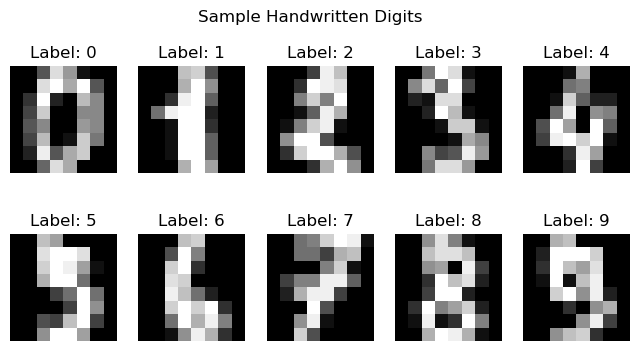

In [15]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.suptitle('Sample Handwritten Digits')
plt.show()


In [16]:
X = digits.data    # Feature matrix
y = digits.target  # Target labels

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)


In [19]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



 Results for SVM - Linear Kernel:
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



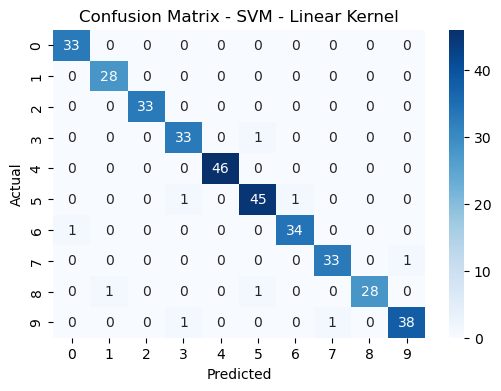

In [20]:
evaluate_model(y_test, y_pred_linear, "SVM - Linear Kernel")

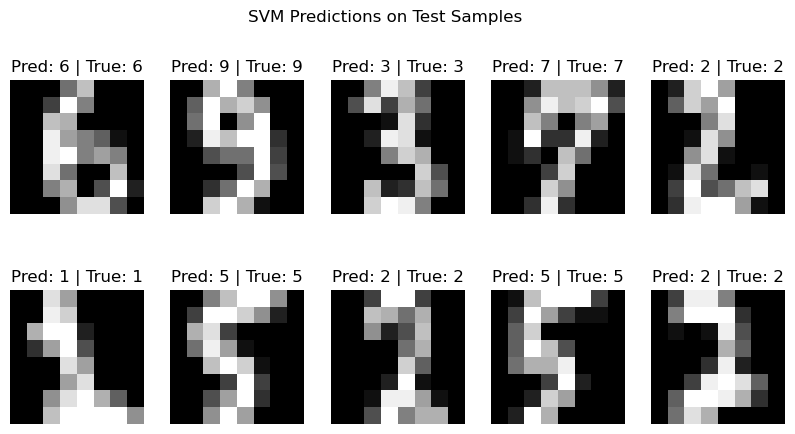

In [21]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred_linear[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.suptitle("SVM Predictions on Test Samples")
plt.show()
